Vertinimas

- Komentarai kodo ir planas veiksmų 25 %
- Programos kodas (algoritmų įgyvendinimas) 25 %
- Grafikai ir lentelės (tvarka) 25 %
- Rezultatas (Istorija aprašanti gautus grafikus, lenteles) 25 %

---
>> **UŽDUOTIS**
>>
>> 1. Akių judesių aptikimas ([EOG]((https://en.wikipedia.org/wiki/Electrooculography)))
>>
>> EOG direktorijoje pateikti įrašai xEOG.csv kur x yra dalyvio numeris.
>>
>> Pirmas stulpelis - EOG vertikalūs elektrodai (V)
>>
>> Antras stulpelis - EOG horizontalūs elektrodai (V)
>>
>> Trečias stulpelis - laikas (ms)
>>
>> - Sutvarkykite duomenis, automatizuokite duomenų analizę.
>> - Aptikite vertikalius akių judesius.
>> - Aptikite horizontalius akių judesius.
>> - Suskaičiuokite EOG parametrus (vidutinę amplitudę, mirksnių dažnį), vizualizuokite ir užsaugokite rezultatus csv faile.
>> - Nubraižyti vidutinį individualų mirksnį.
>> - Nubraižyti vidutinį bendrą mirksnį.
>> - Grafikus užsaugoti png formatu
>>
>>
>> EOG.pdf apibūdina detaliai EOG aptikimą ir bendrą EOG morfologiją (Nereikia pakartoti, tai papildoma informacija aiškumui).
>>
---

In [2]:
# 1 task
#
# Eye movement detection (EOG). The EOG directory contains entries xEOG.csv where x is the participant number. 
# First column - EOG vertical electrodes (V), second column - EOG horizontal electrodes (V), third column - time (ms)
#
# 1. Organise the data, automate the data analysis
# 2. Detect vertical eye movements
# 3. Detect horizontal eye movements
# 4. Calculate EOG parameters (average amplitude, blink rate), visualise and save results in csv file
# 5. Plot the average individual blink
# 6. Plot the average total blink
# 7. Save the graphs in png format

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
import os
import seaborn as sns
import pandas as pd
from scipy import signal
import neurokit2 as nk
import glob

In [105]:
# Nurodau direktoriją, nuskaitau visus .csv failus iš EOG aplanko, pridedu į sąrašą, sukuriu df ir tiesiog patikrinu kaip
# atrodo mano failai.
data_dir = './'
failai = pathlib.Path(data_dir).glob('*EOG.csv')
sarasas = [str(item) for item in failai]
sarasas1 = pd.DataFrame(sarasas)

In [76]:
def pikai(pavadinimas, nr):
    # pasirenku direktoriją, kurioje dirbsiu
    os.chdir('C:\\Users\\Aidas\\biod2021\\exam\\K6\\EOG')
    # Sukuriu funkciją, kuri nuskaito visus eog failus
    data1 = pd.read_csv(pavadinimas, names = ["vertical_1", "horizontal_1", "Laikas"])
    # randu diskretizacijos dažnį (2048 Hz) 
    sample_rate = np.round((len(data1))/(data1.Laikas.max())*1000)
    # sukuriu df su vertical ir laiko stulepliais
    vertical_data1 = data1.drop(labels='horizontal_1', axis=1)
    # sukuriu df su vertical stulpeliu
    vertical_data1_be_laiko = data1["vertical_1"]
    # sukuriu df su laiko stulpeliu
    laikas = vertical_data1.drop(labels='vertical_1', axis=1)
    # Pritaikau firwin filtravimą
    wave =  data1["vertical_1"].to_numpy()          
    nyq_rate = sample_rate / 2.0
    width = 5.0 / nyq_rate
    ripple_db = 60.0
    N, beta = signal.kaiserord(ripple_db, width)
    cutoff_hz = [5]
    filtr = signal.firwin(N, cutoff_hz , window=("kaiser", beta),pass_zero='lowpass',fs=sample_rate)
    filtr1 = (signal.filtfilt(filtr, 1, wave))
    # taikau Savitzky–Golay filtrą
    filtruotas = signal.savgol_filter(filtr1, 21, 2)
    # Naudodamas Neurokit2 pakuotės funkciją randu pikus, juos pažymiu x
    blinks1 = nk.eog_findpeaks(filtruotas, sample_rate, prominence = (200,1000), method="mne")
    # Nubrėžiu vertikalių judesių grafiką bei pavaizduoju pikus
    plt.plot(laikas.Laikas[blinks1], filtruotas[blinks1], 'x')
    plt.plot(laikas.Laikas, filtruotas)
    plt.xlabel('Laikas (ms)')
    plt.ylabel('Amplitudė (V)')
    plt.title(f'Filtruoti vertikalūs akių judesiai {nr}')
    # Išsaugau paveikslėlį png formatu
    plt.savefig(f'Filtruoti vertikalūs akių judesiai {nr}.png')
    plt.show()

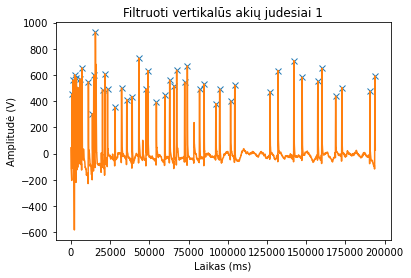

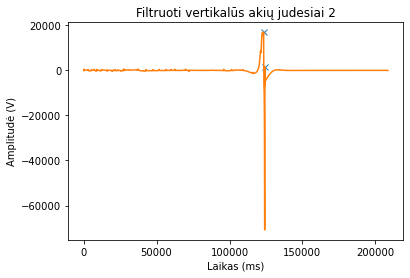

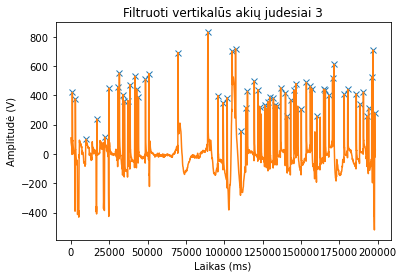

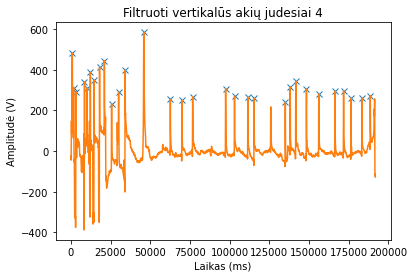

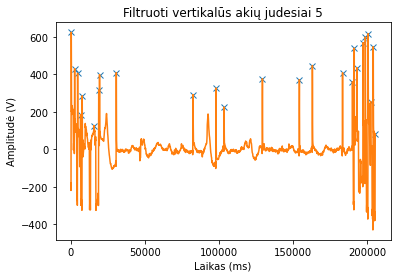

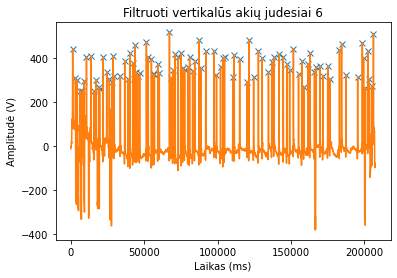

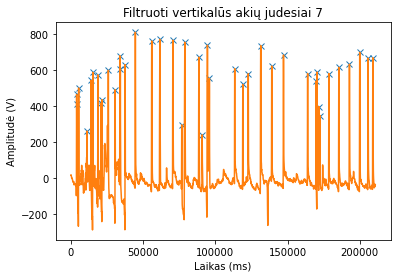

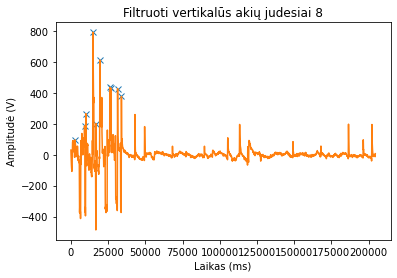

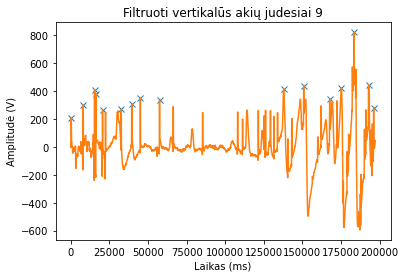

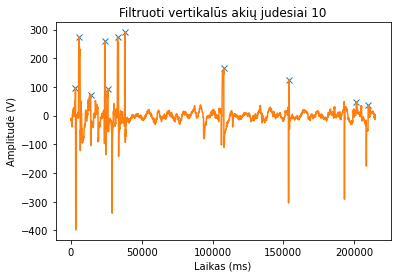

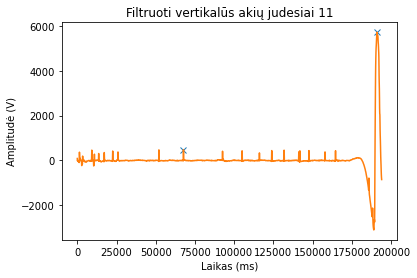

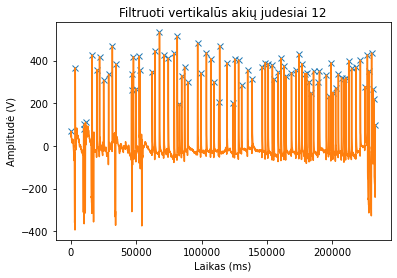

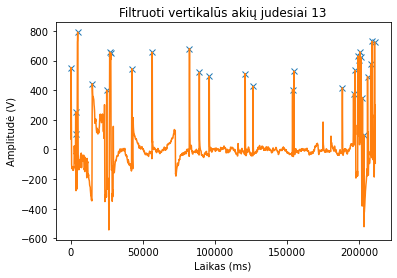

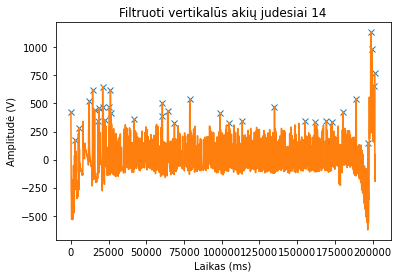

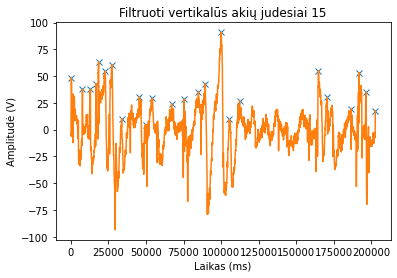

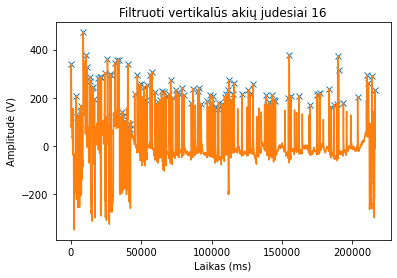

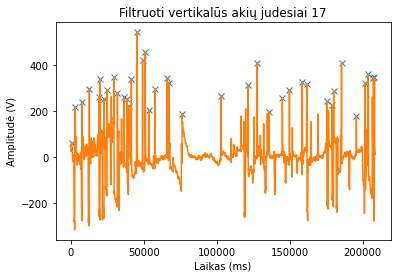

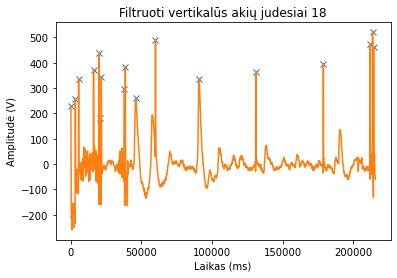

In [77]:
# Sukuriu for ciklą, kuris įvykdo def pikai funkciją kiekvienam tiriamajam 
for x in range(1,19):
    pikai(f'{x}EOG.csv', x)

In [103]:
# REZULTATAS: Signalo filtravimas atliktas sėkmingai, vertikaliais elektrodais registruotame įraše aptikti pikai, tiesa,
# naudojau Neurokit2 paketo pikų aptikimo funkciją, kurioje galimai nesuveikė prominence argumentas, todėl 2 ir 11 
# tiriamųjų įrašuose aptikti pikai, kurie iš tikųjų yra artefaktai, pagal amplitudę labai skiriasi nuo kitų pikų.

In [78]:
# Sukuriu sąrašą tiriamųjų numeriams pažymėti
dff = [10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Paverčių į df
df2 = pd.DataFrame(dff)
eiliskumas = df2.set_axis(['Tiriamojo nr'], axis=1, inplace=False)

In [79]:
# Naudodamas glob funkciją pasirenku .csv failus iš nurodytos direktorijos
files = list(pathlib.Path(data_dir).glob('*EOG.csv'))
# Sukuriu tuščią sąrašą
sarasiukas=[]
# Naudoju for ciklą, kuris nuskaito kiekvieną .csv failą iš direktorijos ir prideda failus į tuščią sąrašą
for ifile in files:
    data = pd.read_csv(ifile,names = ["vertical_1", "horizontal_1", "Laikas"])
    sarasiukas.append(data)

In [80]:
# randu diskretizacijos dažnį
sample_rate = np.round((len(data))/(data.Laikas.max())*1000)
# sukuriu tuščią sąrašą
sarasiukas_3 = []
# sukuriu tuščią sąrašą
sarasiukas_4 = []
# sukuriu for ciklą, kuris iteruoja per visus tiriamųjų .csv failus 
for x in range (0, len(sarasiukas)):
    # iš sąrašiuko .csv failų palieku tik vertikalių judesių stulpelius 
    vert = sarasiukas[x].drop(labels = ["horizontal_1", "Laikas"], axis = 1)
    # iš sąrašiuko .csv failų palieku tik laiko stulpelius
    laikas = sarasiukas[x].drop(labels = ["vertical_1", "horizontal_1"], axis = 1)
    # paverčiu vertikalių judesių stulpelius į vektorius
    eog_vert_signalas = nk.as_vector(vert)
    # naudoju Neurokit2 paketo funkciją signalo filtravimui
    eog_isvalytas = nk.eog_clean(eog_vert_signalas, sample_rate, method='neurokit')
    # naudoju Neurokit2 paketo funkciją pikų suradimui
    blinks = nk.eog_findpeaks(eog_vert_signalas, sample_rate, method="mne")
    # randu vidutines amplitudes - randu medianą amplitudžių ties kuriomis yra pikų indeksai
    vidutine_amplitude = np.round(np.median(eog_vert_signalas[blinks]))
    # randu mirksnių dažnius Hz - padalinu pikų skaičių iš maksimalaus laiko
    mirksniu_daznis = np.round((len(blinks)/(laikas.max())*1000), 3)
    # pridedu vidutinių amplitudžių vertes prie tuščio sąrašo
    sarasiukas_3.append(vidutine_amplitude)
    # pridedu mirksnių dažnių vertes prie tuščio sąrašo
    sarasiukas_4.append(mirksniu_daznis)
    # sukuriu vidutinių amplitudžių verčių df
    vidutines_amplitudes = pd.DataFrame(sarasiukas_3, columns = ["Vidutines amplitudes"])
    # sukuriu mirksnių dažnių verčių df
    mirksniu_dazniai = pd.DataFrame(sarasiukas_4)
    # pakeičių mirksnių dažnių verčių df stulpelio pavadinimą
    mirksniu_dazniai.rename(columns = {'Laikas':'Mirksniu dazniai'}, inplace = True)
    # prie vidutinių amplitudžių df pridedu mirksnių dažnių stulpelį
    lentuke = vidutines_amplitudes.join(mirksniu_dazniai)
    # prie sudėto df pridedu tiriamųjų numerių stulpelį
    lentele = lentuke.join(eiliskumas)
# išsaugau sulipdytą lentelę .csv formatu
lentele.to_csv(r'.\Vidutines amplitudes ir mirksniu dazniai.csv', index = False)
lentele

,Vidutines amplitudes,Mirksniu dazniai,Tiriamojo nr
0,107.0,0.065,10
1,3269.0,0.010,11
2,427.0,0.357,12
3,571.0,0.152,13
4,427.0,0.505,14
5,75.0,0.592,15
6,274.0,0.601,16
7,324.0,0.249,17
8,326.0,0.130,18
9,624.0,0.227,1


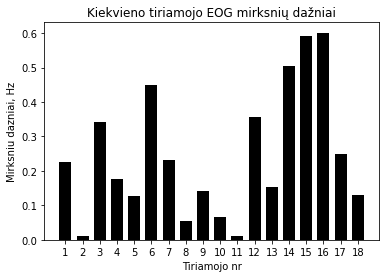

In [84]:
# Nubrėžiu bar plotą, kuris parodo kiekvieno tiriamojo mirksnių dažnį
plt.bar(lentele['Tiriamojo nr'], lentele['Mirksniu dazniai'], color ='black', width = 0.7)
plt.xticks(np.arange(1,19,1))
plt.xlabel('Tiriamojo nr')
plt.ylabel('Mirksniu dazniai, Hz')
plt.title("Kiekvieno tiriamojo EOG mirksnių dažniai")
plt.savefig("Kiekvieno tiriamojo EOG mirksnių dažniai.png")
plt.show()

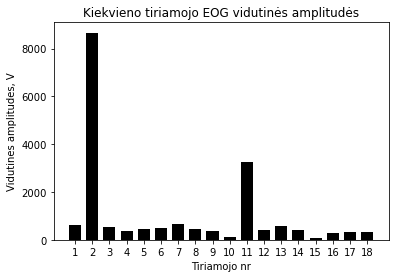

In [85]:
# Nubrėžiu bar plotą, kuris parodo kiekvieno tiriamojo EOG vertikaliais elektrodais registurotų judesių vidutines amplitudes
plt.bar(lentele['Tiriamojo nr'], lentele["Vidutines amplitudes"], color ='black', width = 0.7)
plt.xticks(np.arange(1,19,1))
plt.xlabel('Tiriamojo nr')
plt.ylabel("Vidutines amplitudes, V")
plt.title("Kiekvieno tiriamojo EOG vidutinės amplitudės")
plt.savefig('Kiekvieno tiriamojo EOG vidutinės amplitudės.png')
plt.show()

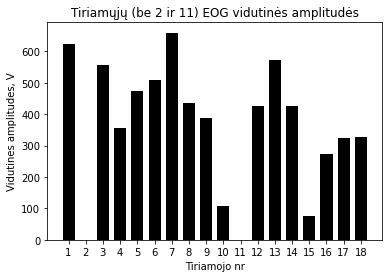

In [89]:
# Nubrėžiu bar plotą, kuris parodo tiriamųjų (be 2 ir 11) EOG vertikaliais elektrodais registurotų judesių vidutines amplitudes
lentele1 = lentele.drop([1,10], axis = 0)
plt.bar(lentele1['Tiriamojo nr'], lentele1["Vidutines amplitudes"], color ='black', width = 0.7)
plt.xticks(np.arange(1,19,1))
plt.xlabel('Tiriamojo nr')
plt.ylabel("Vidutines amplitudes, V")
plt.title("Tiriamųjų (be 2 ir 11) EOG vidutinės amplitudės")
plt.savefig(f'Tiriamųjų (be 2 ir 11) EOG vidutinės amplitudės.png')
plt.show()

In [104]:
# REZULTATAS: Stebint lentelės ir stulpelinių diagramų grafikus galima pastebėti, kad dėl klaidingai aptiktų pikų 2 ir 11
# tiriamųjų vidutinė amplitudės ir mirksnių dažniai parodomi klaidingai. Nr 8 tiriamasis mirksėjo labai mažai, o Nr 16
# daugiausiai. Mirksnių dažnis pasiskirstęs netolygiai, nėra bendros tendencijos. Žvelgiant į vidutinių amplitudžių grafiką
# galima pastebėti, kad dauguma tiraimųjų EOG vid. amplitudės yra didesnės nei 300 V išskyrus 10 tiriamojo, kurio EOG vid.
# amplitudė vos viršija 100 V.

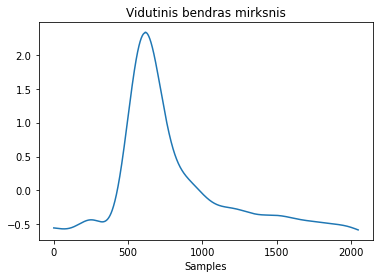

In [152]:
# sukuriu tuščią sąrašą
sarasiukas_2 = []
# sukuriu for ciklą, kuris iteruoja per visus tiriamųjų .csv failus
for x in range (0, len(sarasiukas)):
    # iš sąrašiuko .csv failų palieku tik vertikalių judesių stulpelius
    vert = sarasiukas[x].drop(labels = ["horizontal_1", "Laikas"], axis = 1)
    # paverčiu vertikalių judesių stulpelius į vektorius
    eog_vert_signalas = nk.as_vector(vert)
    # naudoju Neurokit2 paketo funkciją siganlo filtravimui
    eog_isvalytas = nk.eog_clean(eog_vert_signalas, sample_rate, method='neurokit')
    # naudoju Neurokit2 paketo funkciją pikų suradimui
    blinks = nk.eog_findpeaks(eog_isvalytas, sample_rate, method="mne")
    # naudoju Neurokit2 paketo funkciją epochų sukurimui
    events = nk.epochs_create(eog_isvalytas, blinks, sample_rate, epochs_start=-0.3, epochs_end=0.7)
    # naudoju Neurokit2 paketo funkciją epochų pavertimui į masyvą
    data = nk.epochs_to_array(events)
    # naudoju Neurokit2 paketo funkciją, kuri standartizuoja duomenis, padaro taip, kad visi mirksniai būtų vienoje skalėje
    data = nk.standardize(data)
    # randu masyvo (standartizuotų epochų) vidurkius
    epochu_vidurkiai = np.mean(data, axis = 1)
    # pridedu gautus duomenis prie tuščio sąrašo
    sarasiukas_2.append(epochu_vidurkiai)
# naudodamas np.mean funkciją suvidurkinu bendrą mirksnį
vidutinis_bendras_mirksnis = np.mean(sarasiukas_2, axis = 0)
# brėžiu grafiką
plt.plot(vidutinis_bendras_mirksnis)
plt.xlabel('Samples')
plt.title("Vidutinis bendras mirksnis")
plt.savefig("Vidutinis bendras mirksnis.png")

In [92]:
# Sukuriu analogišką funkciją, kuri braižo vidutinio individualaus mirksnio grafiką
def ind_mirksnis(pavadinimas, nr):
    os.chdir('C:\\Users\\Aidas\\biod2021\\exam\\K6\\EOG')
    data1 = pd.read_csv(pavadinimas, names = ["vertical_1", "horizontal_1", "Laikas"])
    sample_rate = np.round((len(data1))/(data1.Laikas.max())*1000)
    vertical_data1 = data1.drop(labels='horizontal_1', axis=1)
    vertical_data1_be_laiko = data1["vertical_1"]
    laikas = vertical_data1.drop(labels='vertical_1', axis=1)
    blinks1 = nk.eog_findpeaks(vertical_data1_be_laiko, sample_rate, method="mne")
    events = nk.epochs_create(vertical_data1_be_laiko, blinks1, sample_rate, epochs_start=-0.3, epochs_end=0.7)
    data = nk.epochs_to_array(events)
    data = nk.standardize(data)
    plt.plot(data, linewidth=0.4)
    plt.plot(np.median(data, axis=1), linewidth=2, linestyle='--', color="black")
    plt.xlabel('Samples')
    plt.title(f'Vidutinis individualus mirksnis {nr}')
    plt.savefig(f'Vidutinis individualus mirksnis {nr}.png')
    plt.show()

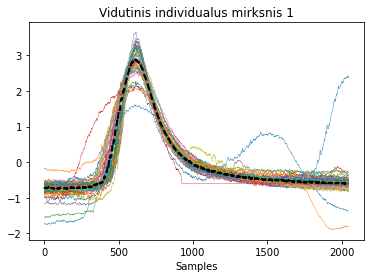

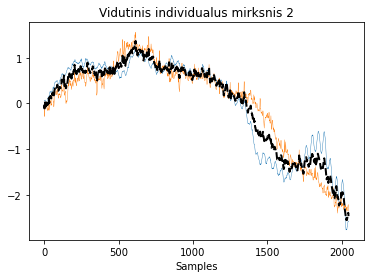

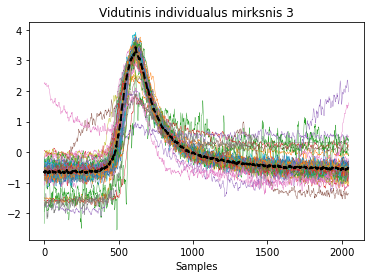

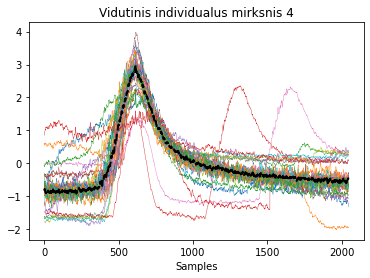

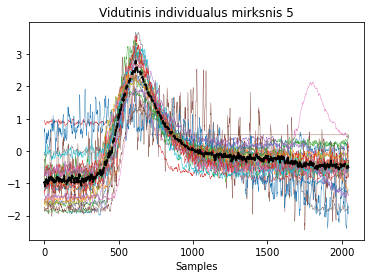

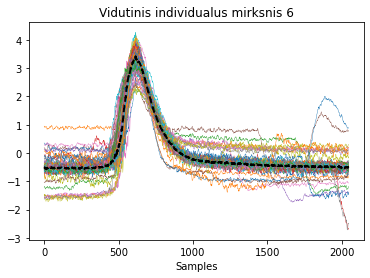

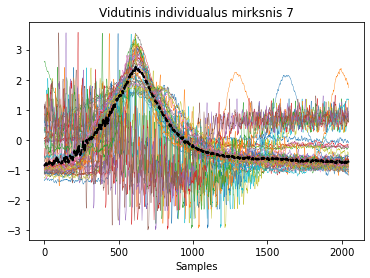

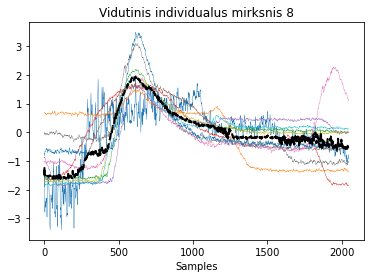

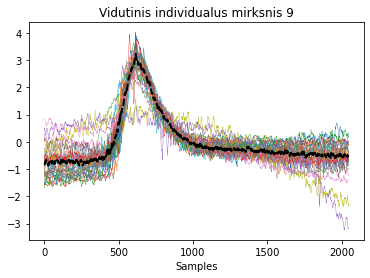

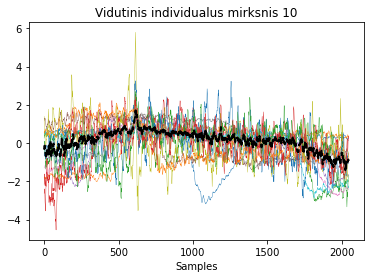

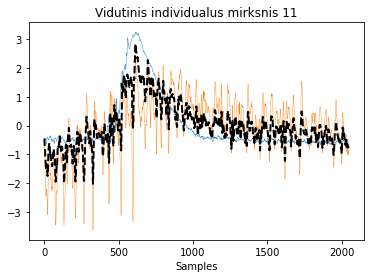

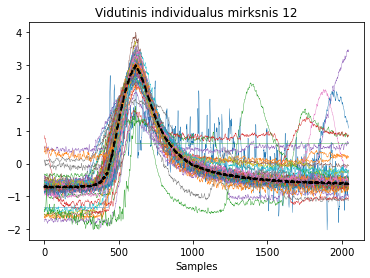

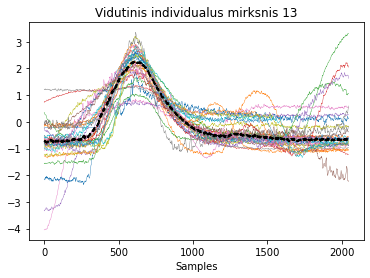

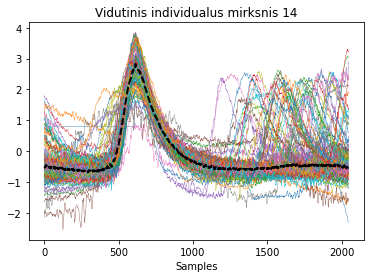

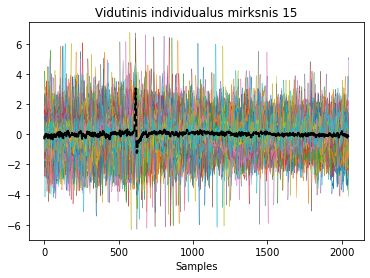

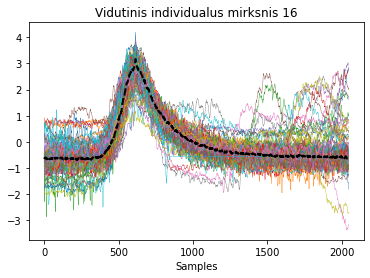

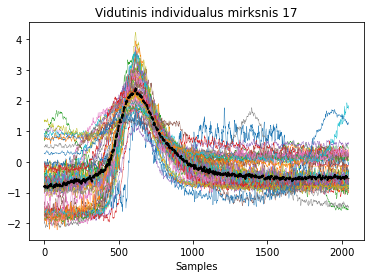

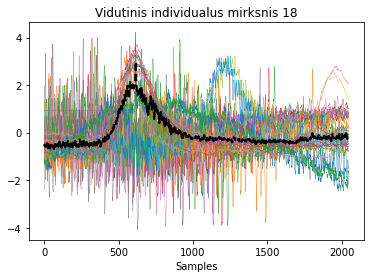

In [93]:
# Sukuriu for ciklą, kuris įvykdo def ind_mirksnis funkciją kiekvienam tiriamajam 
for x in range(1,19):
    ind_mirksnis(f'{x}EOG.csv', x)

In [ ]:
# REZULTATAS: Galima pastebėti, kad visų tiriamųjų (išskyrus 2 ir 11) vidutinis individualus mirksnis pasiekia piką ties
# panašia y ašies "Samples" ("Įvykių") sritimi.

---
>> **TASK**
>>
>> 2. Raumenų aktyvumo analizė (EMG)
>>
>> emg direktorijoje yra pateikti trys raumenų aktyvumo įrašai (4kHz) surinkti naudojant 25 mm adatą įsmeigtą į tiriamojo raumenį (tibialis anterior). Tiriamasis įrašo metu raumenį sutraukdavo judindamas pėdą.
>>
>> - emg_healthy.txt faile pateikti 44 metų sveiko vyro atsakai.
>> - emg_neuropathy.txt faile pateikti 64 metų vyro atsakai su chroniškais nugaros skausmais dėl L5 nervo pažaidos.
>> - emg_myopathy.txt faile pateikti 57 metų miopatija sergančio vyro  atsakai .
>> - failuose pateikta emg amplitudė (V) ir laikas (s).
>>
>> ![emg](./emg/emg.png)
>>
>>
>> - Sutvarkykite ir vizualizuokite duomenis. Atkartokite pateiktą grafiką.
>> - Palyginkite dalyvius.
>>
---

In [4]:
# 2 task
#
# Muscle activity analysis (EMG). The emg directory contains three recordings of muscle activity (4kHz) collected using a 25 mm 
# needle inserted into the subject's muscle (tibialis anterior). The subject contracted the muscle by moving his foot during the
# recording. The emg_healthy.txt file shows the responses of a 44-year-old healthy male. The emg_neuropathy.txt file shows the
# responses of a 64-year-old man with chronic back pain due to L5 nerve damage. The emg_myopathy.txt file contains the responses
# of a 57-year-old man with myopathy. The files contain emg amplitude (V) and time (s).
#
# 1. Organise and visualise the data. Reproduce the given graph (emg.png graphic was given).
# 2. Compare the participants.

In [95]:
# pasirenku direktoriją, kurioje dirbsiu
os. chdir('C:\\Users\\Aidas\\biod2021\\exam\\K6\\emg')
# nuskaitau sveiko žmogaus EMG raumenų aktyvumo įrašą
sveikas = pd.read_csv("emg_healthy.csv", sep=";", header = None)
# priskiriu stulpelių pavadinimus
sveikas.columns = ["Amplitude, V", "Laikas, s"]# Priskiriu stulpelio pavadinimą

In [114]:
# sukuriu kintamąjį, kuriame yra tik amplitudžių stulpelis
sveiko_amplitude = sveikas["Amplitude, V"]
# sukuriu kintamąjį, kuriame yra tik laiko stulpelis
sveiko_laikas = sveikas["Laikas, s"]
# sukuriu kintamąjį, kurio reikšmė - diskretizacjios dažnis 4000 Hz
fs = 4000
# atskiriami skirtingi brėžiniai
%matplotlib inline
# atskiriami skirtingi brėžiniai
# sukuriu 1-1999 Hz filtrą (IIR Butterworth 1st order) kuris pašalina tinklo triukšmą, DC komponentus
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype="band")
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y
y = butter_bandpass_filter(sveiko_amplitude, 1, 1999, fs, order=2)

In [115]:
# Analogiškus žingsnius atlieku su miopatija sergančio vyro EMG įrašu
miopatija = pd.read_csv("emg_myopathy.csv", sep=";", header = None)
miopatija.columns = ["Amplitude, V", "Laikas, s"]

miopatijos_amplitude = miopatija["Amplitude, V"]
miopatijos_laikas = miopatija["Laikas, s"]

%matplotlib inline
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype="band")
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    g = signal.lfilter(b, a, data)
    return g
g = butter_bandpass_filter(miopatijos_amplitude, 1, 1999, fs, order=2)

In [116]:
# Analogiškus žingsnius atlieku su vyro, kuris pasižymi chroniškais nugaros skausmais dėl L5 nervo pažaidos, EMG įrašu
neuropatija = pd.read_csv("emg_neuropathy.csv", sep=";", header = None)
neuropatija.columns = ["Amplitude, V", "Laikas, s"]

neuropatijos_amplitude = neuropatija["Amplitude, V"]
neuropatijos_laikas = neuropatija["Laikas, s"]

%matplotlib inline
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype="band")
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    c = signal.lfilter(b, a, data)
    return c
c = butter_bandpass_filter(neuropatijos_amplitude, 1, 1999, fs, order=2)

<function matplotlib.pyplot.show(close=None, block=None)>

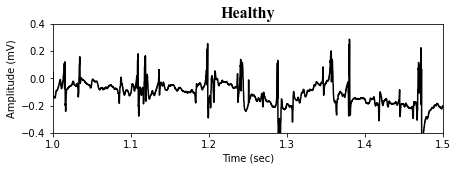

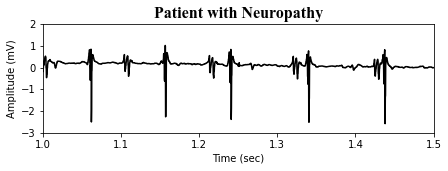

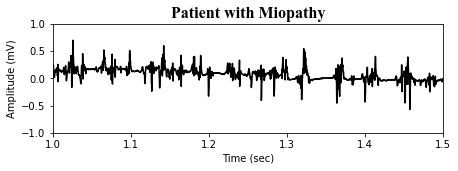

In [117]:
# Nustatau grafiko dydį
plt.subplots(figsize = (7,2))
# Nustatau grafiko dydį
plt.plot(sveiko_laikas, y, color = "black")
# Nustatau y ašies limitus
plt.ylim(-0.4,0.4)
# Nustatau x ašies limitus
plt.xlim(1,1.5)
# Nustatau y ašies žymėjimo vietas
plt.yticks(np.arange(-0.4,0.6,0.2))
# Suteikiu x ir y ašims ir grafikui pavadinimus
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (mV)")
plt.title("Healthy", fontname="Times New Roman", size=16,fontweight="bold")
plt.show
# Analogiškai nubrėžiu grafiką su neuropatijos_laikas duomenimis
plt.subplots(figsize = (7,2))
plt.plot(neuropatijos_laikas, c, color = "black")
plt.ylim(-3,2)
plt.xlim(1,1.5)
plt.yticks(np.arange(-3,3,1))
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (mV)")
plt.title("Patient with Neuropathy", fontname="Times New Roman", size=16,fontweight="bold")
plt.show
# Analogiškai nubrėžiu grafiką su miopatijos_laikas duomenimis
plt.subplots(figsize = (7,2))
plt.plot(miopatijos_laikas, g, color = "black")
plt.ylim(-1,1)
plt.xlim(1,1.5)
plt.yticks(np.arange(-1,1.5,0.5))
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (mV)")
plt.title("Patient with Miopathy", fontname="Times New Roman", size=16,fontweight="bold")
plt.show

In [ ]:
# REZULTATAS: Nubrėžti grafikai visai panašūs į pateiktus, bet neidentiški. Kad būtų identiški, galimai reikėjo naudoti
# butter bandpass filtro kitas order argumento reikšmes. Dalyvių raumenų aktyvumo įrašai labai skiriasi ir iškart galima 
# pastebėti, kuris dalyvis yra sveikas, jo signalo amplitudė yra ne tokia didelė kaip neuropatija ar miopatija sergančių
# vyrų raumenų aktyvumo įrašų. Neuropatija sergančio vyro raumenų aktyvumo įrašo amplitudė yra daug aukštesnė, o 
# signalų periodas yra didesnis. Miopatija sergančio vyro raumenų aktyvumo įrašas panašesnis į sveiko žmogaus, bet 
# periodai tarp pikų yra šiek tiek mažesni.